# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


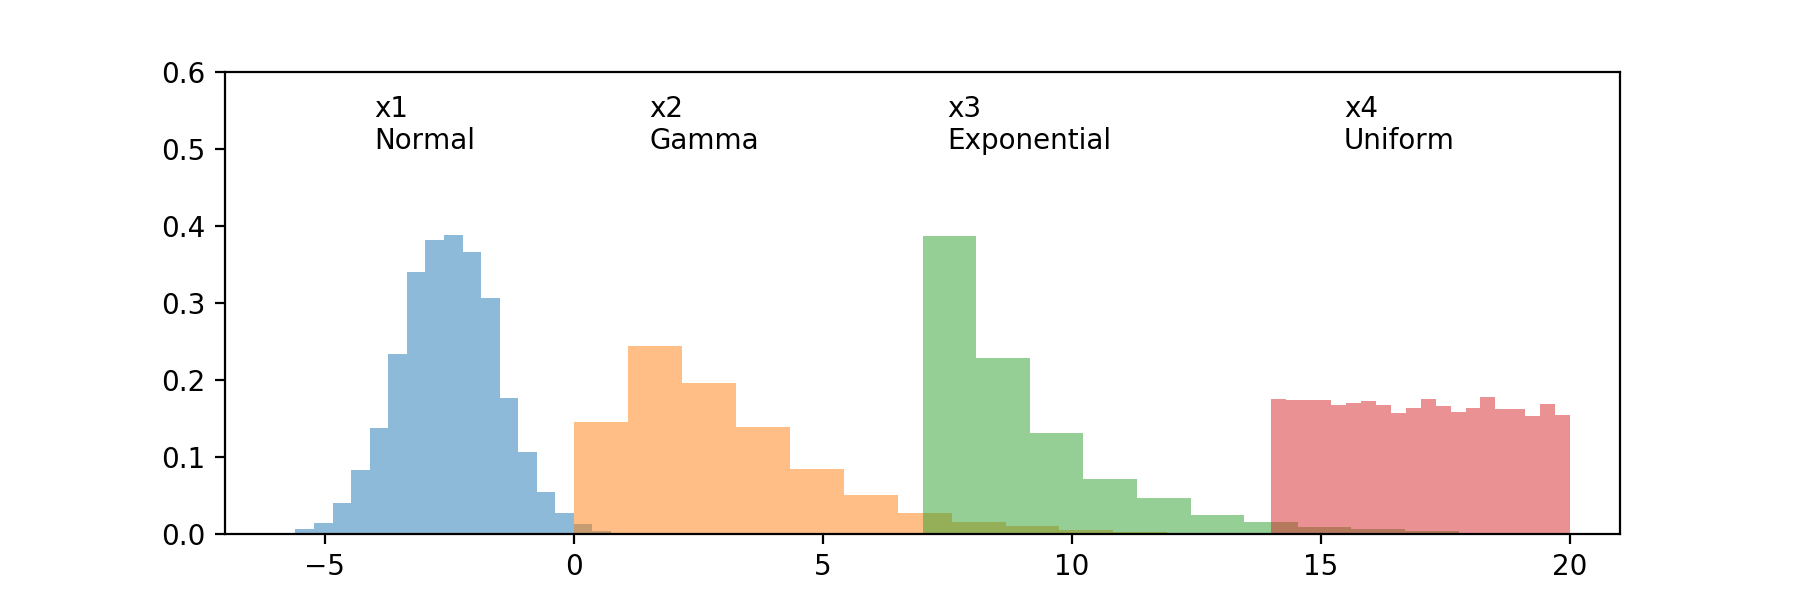

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


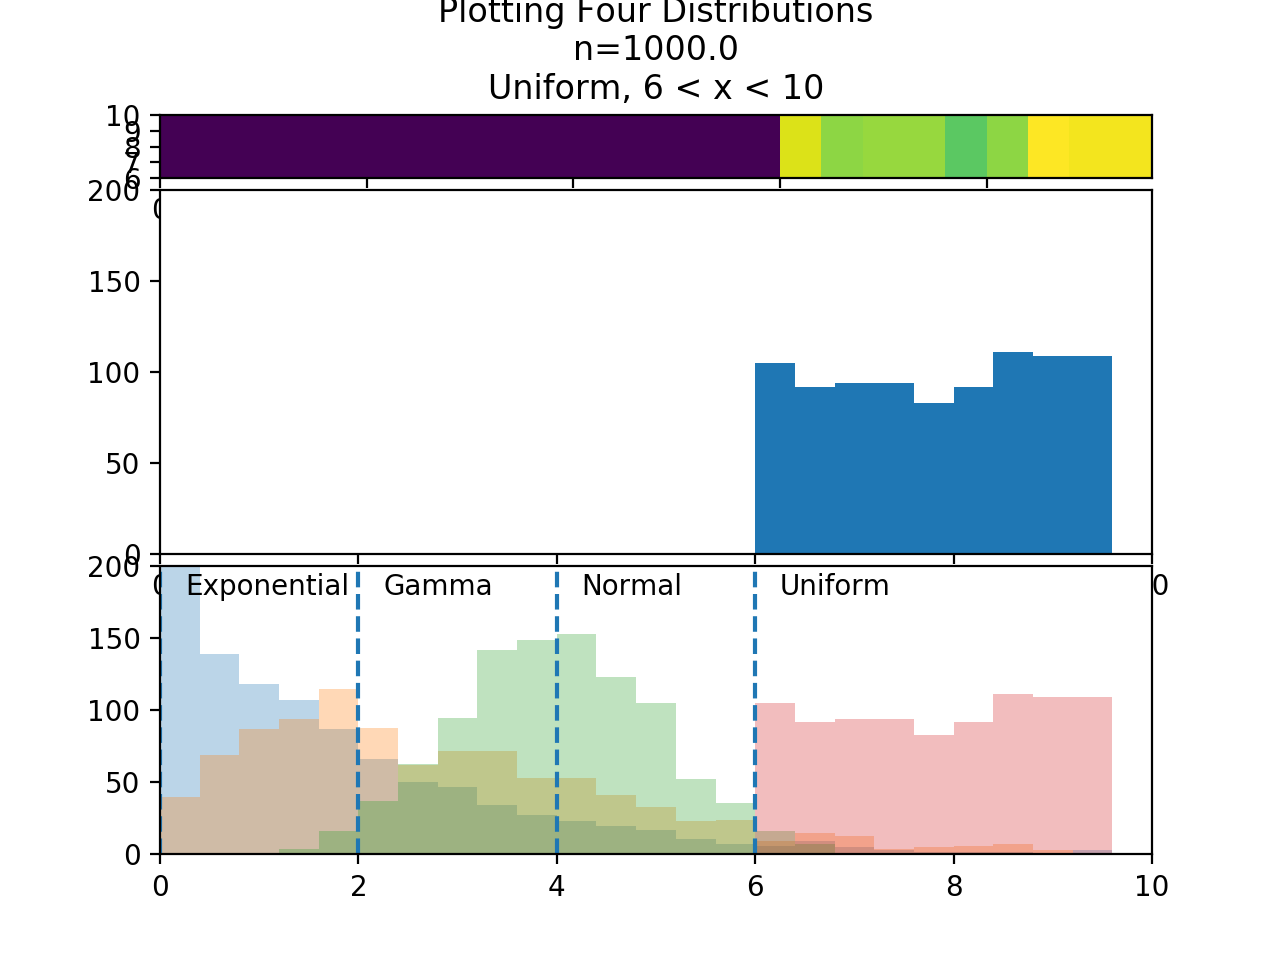

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

%matplotlib notebook

# Setting up the prerequisites
# Change these to change the nature of the distributions
samples = 1000
norm = False
num_bins = 25

x_min_axis = 0
x_max_axis = 10
y_min_axis = 0
y_max_axis = 0.5 if norm else samples / 5

# Change this to change the duration of the animation. More frames = longer animation, and
# shorter steps when plotting the distributions
desired_frames = 40

axis_dims = [x_min_axis,
             x_max_axis,
             y_min_axis,
             y_max_axis]

bins = np.arange(x_min_axis, x_max_axis, ((x_max_axis - x_min_axis) / num_bins))

# Starting to do the actual plotting
fig = plt.figure()

gspec = gridspec.GridSpec(10, 2)

hmap = plt.subplot(gspec[0, 0:])
mainplot = plt.subplot(gspec[1:6, 0:])
alldists = plt.subplot(gspec[6:, 0:])
plots = {'hmap': hmap,
         'mainplot': mainplot, 
         'alldists': alldists}

x1 = np.random.exponential(2, samples)
x2 = np.random.gamma(2, 1.5, samples)
x3 = np.random.normal(4, 1, samples)
x4 = np.random.uniform(6,10, samples)
dists = [x1,x2,x3,x4]

dist_descriptions = [
    'Exponential, Scale Factor = 2',
    'Gamma, Mean = 2',
    'Normal, Mean = 4',
    'Uniform, 6 < x < 10'
]

dist_names = [
    'Exponential', 'Gamma', 'Normal', 'Uniform'
]

line_locations = [0, 2, 4, 6]

# plt.axis(axis_dims)
# mainplot.hist(x1, bins=bins, normed=norm)

# Animation Section

alldists.axis(axis_dims)

def update(current_frame):
    if current_frame == desired_frames:
        a.event_source.stop()
        
    frames_per_dist = desired_frames / len(dists)
    steps_per_frame = samples / frames_per_dist
    dist_index = int(current_frame / frames_per_dist)
    frame_for_dist = current_frame - (dist_index * frames_per_dist)
    
    current_dist = dists[dist_index]
    current_index_for_dist = (frame_for_dist + 1) * steps_per_frame
    
    mainplot.cla()
    mainplot.axis(axis_dims)
    mainplot.hist(current_dist[:current_index_for_dist], bins=bins)
    
    hmap.cla()
    hmap.axis(axis_dims)
    hmap.hist2d(current_dist[:current_index_for_dist], current_dist[:current_index_for_dist], bins=[bins, 1])
    
    hmap.set_title('Plotting Four Distributions\nn={}\n{}'.format(current_index_for_dist, dist_descriptions[dist_index]))
    
    if (current_index_for_dist == samples):
        alldists.axis(axis_dims)
        alldists.hist(current_dist, bins=bins, alpha=0.3)
        alldists.axvline(line_locations[dist_index], linestyle='dashed')
        alldists.text(line_locations[dist_index] + 0.25, y_max_axis - y_max_axis / 10, dist_names[dist_index])

a = animation.FuncAnimation(fig, update, interval = 10)